# Task

<pre>
1. Preprocess all the Data we have in DonorsChoose <a href='https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60'>Dataset</a> use train.csv
2. Combine 4 essay's into one column named - 'preprocessed_essays'.
3. After step 2 you have to train 3 types of models as discussed below.
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below.
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>.
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF.
8. Use Categorical Cross Entropy as Loss to minimize.
</pre>

### 1.1 Loading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import time
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten, LSTM, Concatenate, BatchNormalization, Embedding, Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
filepath = '/content/drive/My Drive/Assignments/As26_LSTM on Donors Choose Dataset/'

In [ ]:
data = pd.read_csv(filepath+'preprocessed_data.csv')
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


### 1.2 Splitting data into Train and cross validation and test data: Stratified Sampling

In [ ]:
X = data.drop(['project_is_approved'], axis=1) # independent input features
y = data['project_is_approved']   # dependent Target variable

print(X.shape, y.shape)

X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size =0.1, stratify = y, random_state= 15)
X_train, X_cv, y_train, y_cv = train_test_split(X_train_cv, y_train_cv, test_size =0.11, stratify = y_train_cv, random_state= 15)

print('Train data shape:', X_train.shape, y_train.shape)  # train data
print('CV data shape:', X_cv.shape, y_cv.shape)  # train data
print('Test data shape: ', X_test.shape, y_test.shape)    # test data

(109248, 8) (109248,)
Train data shape: (87507, 8) (87507,)
CV data shape: (10816, 8) (10816,)
Test data shape:  (10925, 8) (10925,)


In [ ]:
# one hot encoding class label
from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_cv_ohe = to_categorical(y_cv)
y_test_ohe = to_categorical(y_test)

print('shape of class label data on train, cv and test data respectively:' , y_train_ohe.shape, y_cv_ohe.shape, y_test_ohe.shape)

shape of class label data on train, cv and test data respectively: (87507, 2) (10816, 2) (10925, 2)


### 1.3 Useful Functions

#### Models

In [ ]:
# Model_1

def Model_1():

    # input_1: essay
    n1 = X_train_essay.shape[1]  # input length
    input1 = Input(shape=(n1,))
    x1 = Embedding(essay_vocab_size, embedding_matrix_essay.shape[1], weights=[embedding_matrix_essay], input_length=n1, trainable=False)(input1)
    x1 = LSTM(128, return_sequences=True)(x1)
    x1 = Flatten()(x1)

    # input_2: school_state
    n2 = X_train_school_state.shape[1]   # input length
    input2 = Input(shape=(n2,))
    x2 = Embedding(school_state_vocab_size, 2, input_length= n2)(input2)
    x2 = Flatten()(x2)

    # input_3: project_grade_category
    n3 = X_train_project_grade_category.shape[1]
    input3 = Input(shape=(n3,))
    x3 = Embedding(project_grade_category_vocab_size, 2, input_length=n3)(input3)
    x3 = Flatten()(x3)

    # input_4: clean_categories
    n4 = X_train_clean_categories.shape[1]
    input4 = Input(shape=(n4,))
    x4 = Embedding(clean_categories_vocab_size, 3, input_length=n4)(input4)
    x4 = Flatten()(x4)

    # input_5: clean_subcategories
    n5 = X_train_clean_subcategories.shape[1]
    input5 = Input(shape=(n5,))
    x5 = Embedding(clean_subcategories_vocab_size, 4, input_length=n5)(input5)
    x5 = Flatten()(x5)

    # input_6: teacher_prefix
    n6 = X_train_teacher_prefix.shape[1]
    input6 = Input(shape=(n6,))
    x6 = Embedding(teacher_prefix_vocab_size, 2, input_length=n6)(input6)
    x6 = Flatten()(x6)

    # input_7: Numerical features
    n7 = X_train_numerical_features.shape[1]
    input7 = Input(shape=(n7,))
    x7 = Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(input7)


    x = Concatenate()([x1, x2, x3, x4, x5, x6, x7])
    x = Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
    x = Dropout(0.6)(x)
    x = Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
    x = Dropout(0.6)(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
    output = Dense(2, activation='softmax')(x)

    model = Model([input1, input2, input3, input4, input5, input6, input7], output, name='Model_1')

    return model

In [ ]:
# Model_2

def Model_2():

    # input_1: essay
    n1 = X_train_essay_iqr.shape[1]  # input length
    input1 = Input(shape=(n1,))
    x1 = Embedding(essay_iqr_vocab_size, embedding_matrix_essay_iqr.shape[1], weights=[embedding_matrix_essay_iqr], input_length=n1, trainable=False)(input1)
    x1 = LSTM(128, return_sequences=True)(x1)
    x1 = Flatten()(x1)

    # input_2: school_state
    n2 = X_train_school_state.shape[1]   # input length
    input2 = Input(shape=(n2,))
    x2 = Embedding(school_state_vocab_size, 2, input_length= n2)(input2)
    x2 = Flatten()(x2)

    # input_3: project_grade_category
    n3 = X_train_project_grade_category.shape[1]
    input3 = Input(shape=(n3,))
    x3 = Embedding(project_grade_category_vocab_size, 2, input_length=n3)(input3)
    x3 = Flatten()(x3)

    # input_4: clean_categories
    n4 = X_train_clean_categories.shape[1]
    input4 = Input(shape=(n4,))
    x4 = Embedding(clean_categories_vocab_size, 3, input_length=n4)(input4)
    x4 = Flatten()(x4)

    # input_5: clean_subcategories
    n5 = X_train_clean_subcategories.shape[1]
    input5 = Input(shape=(n5,))
    x5 = Embedding(clean_subcategories_vocab_size, 4, input_length=n5)(input5)
    x5 = Flatten()(x5)

    # input_6: teacher_prefix
    n6 = X_train_teacher_prefix.shape[1]
    input6 = Input(shape=(n6,))
    x6 = Embedding(teacher_prefix_vocab_size, 2, input_length=n6)(input6)
    x6 = Flatten()(x6)

    # input_7: Numerical features
    n7 = X_train_numerical_features.shape[1]
    input7 = Input(shape=(n7,))
    x7 = Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(input7)


    x = Concatenate()([x1, x2, x3, x4, x5, x6, x7])
    x = Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
    x = Dropout(0.6)(x)
    x = Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
    x = Dropout(0.6)(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
    output = Dense(2, activation='softmax')(x)

    model = Model([input1, input2, input3, input4, input5, input6, input7], output, name='Model_1')

    return model

In [ ]:
# Model_3

def Model_3():

    # input_1: essay
    n1 = X_train_essay_iqr.shape[1]  # input length
    input1 = Input(shape=(n1,))
    x1 = Embedding(essay_iqr_vocab_size, embedding_matrix_essay_iqr.shape[1], weights=[embedding_matrix_essay_iqr], input_length=n1, trainable=False)(input1)
    x1 = LSTM(128, return_sequences=True)(x1)
    x1 = Flatten()(x1)

    # input_2: Other than essay feature
    n2 = X_train_other_than_essay.shape[1]
    input2 = Input(shape=(n2,1))
    x2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_initializer= 'he_normal', kernel_regularizer='l2')(input2)
    x2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_initializer= 'he_normal', kernel_regularizer='l2')(x2)
    x2 = Flatten()(x2)

    x = Concatenate()([x1, x2])
    x = Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
    x = Dropout(0.6)(x)
    x = Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
    x = Dropout(0.6)(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
    output = Dense(2, activation='softmax')(x)

    model = Model([input1, input2], output, name='Model_3')

    return model

#### Callbacks

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TerminateOnNaN
import datetime

# Load the TensorBoard notebook extension
%load_ext tensorboard

NaN_terminator = TerminateOnNaN()
earlystopping = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.001, patience=2, verbose=1)

# https://keras.io/api/callbacks/model_checkpoint/#:~:text=Callback%20to%20save%20the%20Keras,training%20from%20the%20state%20saved.
checkpoint_path = filepath +'model_ckpt/model_1/model_1_weights-{epoch:02d}-{val_accuracy:.4f}.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_auc',
    mode='max',
    save_weights_only=True,
    save_best_only=True)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

callback_list = [NaN_terminator, earlystopping, model_checkpoint, tensorboard_callback]

In [ ]:
# from sklearn.metrics import precision_recall_curve, auc

# # https://datascience.stackexchange.com/questions/13746/how-to-define-a-custom-performance-metric-in-keras/20192#20192
# # https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

# class PR_AUC(tf.keras.callbacks.Callback):

#     def __init__(self, train_data, validation_data):
#         self.validation_data = validation_data
#         self.train_data = train_data

#     def on_train_begin(self, logs={}):
#         self.auc = []
#         self.val_auc = []

#     def on_epoch_end(self, epoch, logs={}):

#         # on train data
#         tr_pred_score = np.asarray(self.model.predict(self.train_data[0]))
#         tr_target = self.train_data[1]
#         tr_precision, tr_recall, _ = precision_recall_curve(tr_target, tr_pred_score)
#         tr_auc_score = auc(tr_recall, tr_precision)
#         self.auc.append(tr_auc_score)

#         # on validation data
#         val_pred_score = np.asarray(self.model.predict(self.validation_data[0]))
#         val_target = self.validation_data[1]
#         val_precision, val_recall, _ = precision_recall_curve(val_target, val_pred_score)
#         val_auc_score = auc(val_recall, val_precision)
#         self.val_auc.append(val_auc_score)

#         print(" - auc: {0}    - val_auc: {1}".format(np.round(tr_auc_score,4), np.round(val_auc_score,4)))

#### Misc. Functions

In [ ]:
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def encode_pad_text_data(train_feature, cv_feature, test_feature, return_vocab = False):
    '''Encodes and pads text data to numerical sequence'''

    # Encode text data to numerical sequence
    # Find max length of sequence
    # Zero pad to make all sequence of same length
    # if return_vocab, get vocabulary data

    tokenizer = Tokenizer(filters='')  # Filters is none as data is preprocessed and we need '_'
    tokenizer.fit_on_texts(train_feature)

    vocab = dict(tokenizer.word_index.items())
    vocab_size = len(vocab) + 1         # plus 1 for zero padding
    print('Vocabulary size: ', vocab_size)

    X_train_encoded = tokenizer.texts_to_sequences(train_feature)
    X_cv_encoded = tokenizer.texts_to_sequences(cv_feature)
    X_test_encoded = tokenizer.texts_to_sequences(test_feature)

    max_length = max([len(doc.split()) for doc in train_feature])
    print('Max length of documents :', max_length)

    X_train_padded = pad_sequences(X_train_encoded, maxlen = max_length, padding='post')
    X_cv_padded = pad_sequences(X_cv_encoded, maxlen = max_length, padding='post')
    X_test_padded = pad_sequences(X_test_encoded, maxlen = max_length, padding='post')
    print('Shape of feature ' +train_feature.name+ ' in train data after padding: ', X_train_padded.shape)
    print('Shape of feature ' +cv_feature.name+ ' in cv data after padding: ', X_cv_padded.shape)
    print('Shape of feature ' +test_feature.name+ ' in test data after padding: ', X_test_padded.shape)
    print('\n')

    if return_vocab:
        return X_train_padded, X_cv_padded, X_test_padded, vocab, vocab_size
    else:
        return X_train_padded, X_cv_padded, X_test_padded, vocab_size

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoder(train_feature, cv_feature, test_feature):
    enc = OneHotEncoder(sparse = False, handle_unknown='ignore')
    tr_feature_ohe = enc.fit_transform(train_feature.values.reshape(-1,1))
    cv_feature_ohe = enc.transform(cv_feature.values.reshape(-1,1))
    te_feature_ohe = enc.transform(test_feature.values.reshape(-1,1))

    print('Shape of feature ' +train_feature.name+ ' in train data after one hot encoding: ', tr_feature_ohe.shape)
    print('Shape of feature ' +cv_feature.name+ ' in cv data  after one hot encoding: ', cv_feature_ohe.shape)
    print('Shape of feature ' +test_feature.name+ ' in test data after one hot encoding: ', te_feature_ohe.shape)
    print('\n')
    return tr_feature_ohe, cv_feature_ohe, te_feature_ohe

In [ ]:
def tfidf_iqr_filter(essay):

    filtered = []
    for word in essay.split():
        if word in tfidf_features_iqr:
            filtered.append(word)

    return ' '.join(filtered)

In [ ]:
def evaluate_model(train_data, test_data, model_name, best_weights_file):

    # Load the model
    with open(filepath+'model_ckpt/'+model_name+'/'+model_name+'.json', 'r') as json_file:
        loaded_model_json = json_file.read()

    best_model = model_from_json(loaded_model_json)
    best_model.load_weights(filepath+'model_ckpt/'+model_name+'/'+best_weights_file)
    best_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(curve='PR')])

    # evaluate the model
    train_loss, train_accuracy, train_auc = best_model.evaluate(train_data)
    test_loss, test_accuracy, test_auc = best_model.evaluate(test_data)
    print('PR-AUC on training data  : %.3f' % (train_auc*100), '%')
    print('PR-AUC on validation data      : %.3f' % (test_auc*100), '%')

    print('\noverfitting percentage     : %.3f' % ((train_auc - test_auc)*100), '%')

### 1.4 Embedding Text feature: Essay

In [ ]:
X_train_essay, X_cv_essay, X_test_essay, essay_vocab, essay_vocab_size = encode_pad_text_data(X_train.essay, X_cv.essay, X_test.essay, return_vocab=True)

Vocabulary size:  51761
Max length of documents : 339
Shape of feature essay in train data after padding:  (87507, 339)
Shape of feature essay in cv data after padding:  (10816, 339)
Shape of feature essay in test data after padding:  (10925, 339)


In [ ]:
# Importing Glove model
import pickle
with open(filepath + 'glove_vectors', 'rb') as f:
    glove_model = pickle.load(f)
    # glove_words = set(glove_model.keys())  # set of words in glove model

In [ ]:
# get embedding matrix for feature essay

embedding_matrix_essay = np.zeros((essay_vocab_size, 300))
for word, i in essay_vocab.items():
    try:
      embedding_vector = glove_model[word]
      embedding_matrix_essay[i] = embedding_vector
    except:
      continue

print('Shape of essay embedding matrix:', embedding_matrix_essay.shape)
# embedding_matrix_essay

Shape of essay embedding matrix: (51761, 300)


### 1.5 Tokenize Categorical data and convert to numerical sequence

In [ ]:
# School_state
X_train_school_state, X_cv_school_state, X_test_school_state, school_state_vocab_size = encode_pad_text_data(X_train.school_state, X_cv.school_state, X_test.school_state)

# project_grade_category
X_train_project_grade_category, X_cv_project_grade_category, X_test_project_grade_category, project_grade_category_vocab_size = encode_pad_text_data(X_train.project_grade_category, X_cv.project_grade_category, X_test.project_grade_category)

# clean_categories
X_train_clean_categories, X_cv_clean_categories, X_test_clean_categories, clean_categories_vocab_size = encode_pad_text_data(X_train.clean_categories, X_cv.clean_categories, X_test.clean_categories)

# clean_subcategories
X_train_clean_subcategories, X_cv_clean_subcategories, X_test_clean_subcategories, clean_subcategories_vocab_size = encode_pad_text_data(X_train.clean_subcategories, X_cv.clean_subcategories, X_test.clean_subcategories)

# teacher_prefix
X_train_teacher_prefix, X_cv_teacher_prefix, X_test_teacher_prefix, teacher_prefix_vocab_size = encode_pad_text_data(X_train.teacher_prefix, X_cv.teacher_prefix, X_test.teacher_prefix)

Vocabulary size:  52
Max length of documents : 1
Shape of feature school_state in train data after padding:  (87507, 1)
Shape of feature school_state in cv data after padding:  (10816, 1)
Shape of feature school_state in test data after padding:  (10925, 1)


### 1.6 Numerical Features

In [ ]:
# teacher_number_of_previously_posted_projects   AND   price

X_train_numerical_features = np.array(list(zip(X_train.teacher_number_of_previously_posted_projects, X_train.price)))
X_cv_numerical_features = np.array(list(zip(X_cv.teacher_number_of_previously_posted_projects, X_cv.price)))
X_test_numerical_features = np.array(list(zip(X_test.teacher_number_of_previously_posted_projects, X_test.price)))

print('Shape of numerical features of train data : ', X_train_numerical_features.shape)
print('Shape of numerical features of train data : ', X_cv_numerical_features.shape)
print('Shape of numerical features of train data : ', X_test_numerical_features.shape)

Shape of numerical features of train data :  (87507, 2)
Shape of numerical features of train data :  (10816, 2)
Shape of numerical features of train data :  (10925, 2)


### Model-1

Build and Train deep neural network as shown below

#### Model_1 info

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output.
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer.
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that.



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance.

In [ ]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
# input_layer = Input(shape=(n,))
# embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
# flatten = Flatten()(embedding)

1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs.

#### Compile, fit and evaluate Model_1

Model: "Model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 339)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 339, 300)     15528300    input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
____________________________________________________________________________________________

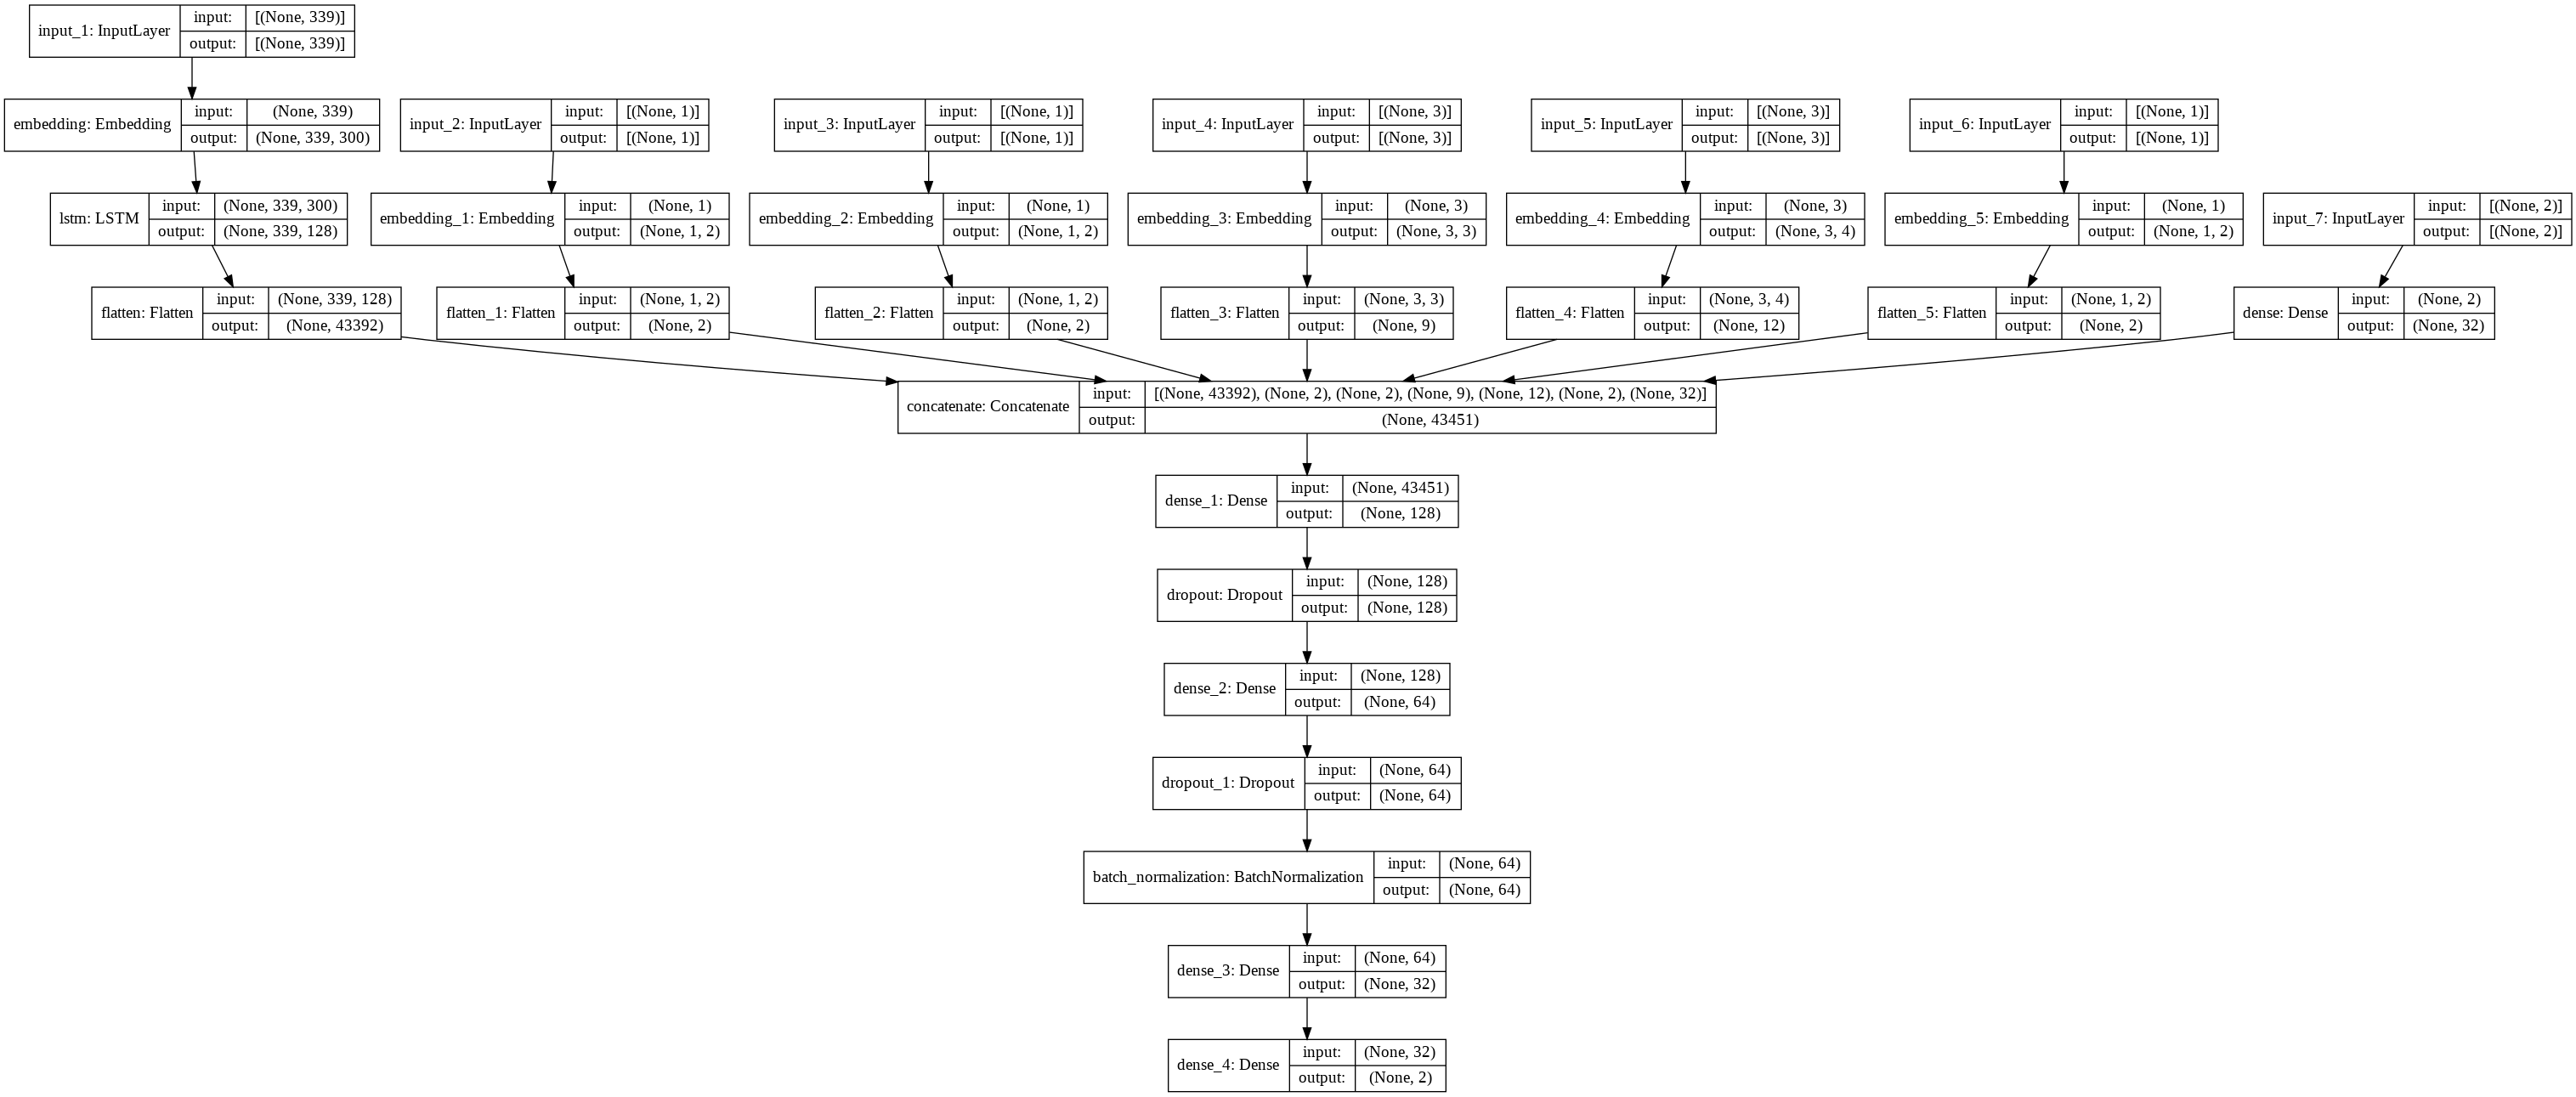

In [ ]:
tf.keras.backend.clear_session()
model_1 = Model_1()
model_1_json = model_1.to_json()
with open(filepath+'model_ckpt/model_1/model_1.json', 'w') as json_file:
    json_file.write(model_1_json)
model_1.summary()
print('\n')
plot_model(model_1, show_shapes=True)

In [ ]:
tf.keras.backend.clear_session()
model_1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(curve='PR')])

train_input_list = [X_train_essay, X_train_school_state, X_train_project_grade_category, X_train_clean_categories, X_train_clean_subcategories, X_train_teacher_prefix, X_train_numerical_features]
cv_input_list = [X_cv_essay, X_cv_school_state, X_cv_project_grade_category, X_cv_clean_categories, X_cv_clean_subcategories, X_cv_teacher_prefix, X_cv_numerical_features]
test_input_list = [X_test_essay, X_test_school_state, X_test_project_grade_category, X_test_clean_categories, X_test_clean_subcategories, X_test_teacher_prefix, X_test_numerical_features]

model_1.fit(x= train_input_list, y = y_train_ohe, batch_size=2048, epochs=10, validation_data=(cv_input_list, y_cv_ohe), callbacks = callback_list)

Epoch 1/2
43/43 [==============================] - 58s 544ms/step - loss: 3.7392 - accuracy: 0.6175 - auc: 0.5653 - val_loss: 2.2561 - val_accuracy: 0.8486 - val_auc: 0.7924
Epoch 2/2
43/43 [==============================] - 23s 531ms/step - loss: 2.0516 - accuracy: 0.8210 - auc: 0.8152 - val_loss: 1.6560 - val_accuracy: 0.8486 - val_auc: 0.8290


In [ ]:
# Evaluate model
evaluate_model(train_input_list, test_input_list, 'model_1', best_weights_file)

### Model-2

#### Model_2 info

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below.

<pre>
1. Train the TF-IDF on the Train data <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

#### Analysis of train text feature essay using idf values and create feature set

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train.essay)

idf_values = vectorizer.idf_
tfidf_features = vectorizer.get_feature_names()

assert len(idf_values) == len(tfidf_features)
print('Number of tf-idf features:', len(tfidf_features))

Number of tf-idf features: 51724


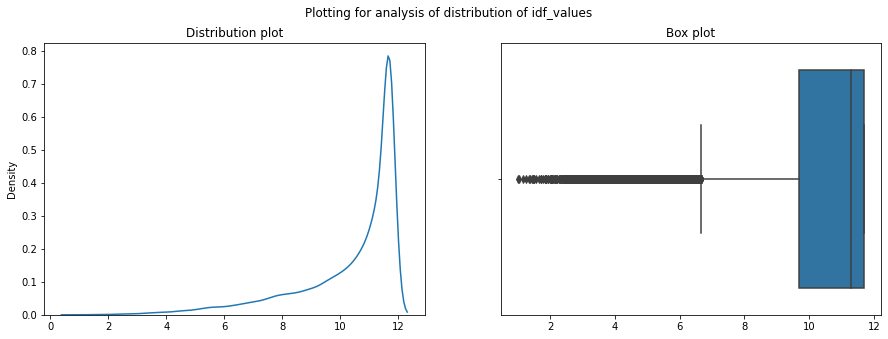

0 th percentile idf value:  1.0076974196343373
5 th percentile idf value:  6.320362301156001
10 th percentile idf value:  7.61731156194004
15 th percentile idf value:  8.42824177815637
20 th percentile idf value:  9.121388958716315
25 th percentile idf value:  9.671435295635588
30 th percentile idf value:  10.076900403743752
35 th percentile idf value:  10.433575347682483
40 th percentile idf value:  10.770047584303697
45 th percentile idf value:  10.993191135617908
50 th percentile idf value:  11.280873208069687
55 th percentile idf value:  11.280873208069687
60 th percentile idf value:  11.280873208069687
65 th percentile idf value:  11.686338316177851
70 th percentile idf value:  11.686338316177851
75 th percentile idf value:  11.686338316177851
80 th percentile idf value:  11.686338316177851
85 th percentile idf value:  11.686338316177851
90 th percentile idf value:  11.686338316177851
95 th percentile idf value:  11.686338316177851
100 th percentile idf value:  11.686338316177851


In [ ]:
# Plotting for analysis of distribution of idf values

f, axs = plt.subplots(1,2, figsize = (15,5))
sns.kdeplot(x=idf_values, ax = axs[0]).set_title('Distribution plot')
sns.boxplot(x=idf_values, ax=axs[1]).set_title('Box plot')
f.suptitle('Plotting for analysis of distribution of idf_values')
plt.show()

for i in range(0,101,5):
    print(i,'th percentile idf value: ', np.percentile(idf_values, i))

As we can see that the graph is highly skewed towards high idf values, there are lot of words which appear in very less number of documents and our 75th percentile is equal to maximum idf value which is not useful.
So, we will consider the words which appear in atleast 5 documents

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=5)
vectorizer.fit(X_train.essay)

idf_values = vectorizer.idf_
tfidf_features = vectorizer.get_feature_names()

assert len(idf_values) == len(tfidf_features)
print('Number of tf-idf features:', len(tfidf_features))

Number of tf-idf features: 20393


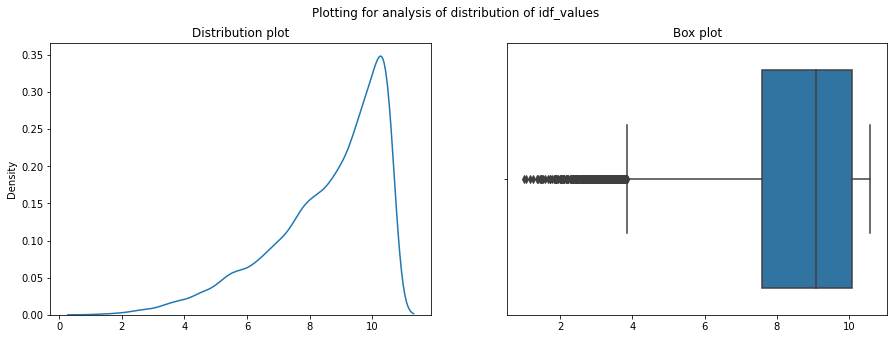

0 th percentile idf value:  1.0076974196343373
5 th percentile idf value:  4.9800874134064435
10 th percentile idf value:  5.90436118410407
15 th percentile idf value:  6.623743283150885
20 th percentile idf value:  7.145176872297993
25 th percentile idf value:  7.583694951141056
30 th percentile idf value:  7.925138200484289
35 th percentile idf value:  8.236350770346265
40 th percentile idf value:  8.550844100248703
45 th percentile idf value:  8.824137435248383
50 th percentile idf value:  9.083648630733467
55 th percentile idf value:  9.316355052760434
60 th percentile idf value:  9.546272152681581
65 th percentile idf value:  9.671435295635588
70 th percentile idf value:  9.894578846949797
75 th percentile idf value:  10.076900403743752
80 th percentile idf value:  10.182260919401578
85 th percentile idf value:  10.300043955057962
90 th percentile idf value:  10.433575347682483
95 th percentile idf value:  10.587726027509742
100 th percentile idf value:  10.587726027509742


In [ ]:
# Plotting for analysis of distribution of idf values

f, axs = plt.subplots(1,2, figsize = (15,5))
sns.kdeplot(x=idf_values, ax = axs[0]).set_title('Distribution plot')
sns.boxplot(x=idf_values, ax=axs[1]).set_title('Box plot')
f.suptitle('Plotting for analysis of distribution of idf_values')
plt.show()

for i in range(0,101,5):
    print(i,'th percentile idf value: ', np.percentile(idf_values, i))

Now, we will take the words that lie in the inter quartile range

In [ ]:
# Selecting only those words whose idf values lie in inter quartile range

# https://stackoverflow.com/questions/6570473/get-indices-of-array-where-two-conditions-on-different-arrays-are-true/6570527
tfidf_features_idx_iqr = np.argwhere((idf_values>= np.percentile(idf_values,25)) & (idf_values<= np.percentile(idf_values,75))).flatten()
tfidf_features_iqr = list(np.array(tfidf_features)[tfidf_features_idx_iqr])
tfidf_features_idf_iqr = idf_values[tfidf_features_idx_iqr]

print('min idf value (25th percentile) selected : ', min(tfidf_features_idf_iqr))
print('max idf value (75th percentile) selected : ', max(tfidf_features_idf_iqr))
print('Number of tf_idf features in the inter quartile range: ', len(tfidf_features_iqr))

min idf value (25th percentile) selected :  7.583694951141056
max idf value (75th percentile) selected :  10.076900403743752
Number of tf_idf features in the inter quartile range:  10887


In [ ]:
%%time
from concurrent.futures import ProcessPoolExecutor

with ProcessPoolExecutor() as executor:
    results = executor.map(tfidf_iqr_filter, X_train['essay'])

X_train_essay_filtered = []
for result in results:
    X_train_essay_filtered.append(result)

CPU times: user 1min 7s, sys: 8.21 s, total: 1min 15s
Wall time: 1h 1min 46s


In [ ]:
%%time
with ProcessPoolExecutor() as executor:
    results = executor.map(tfidf_iqr_filter, X_cv['essay'])

X_cv_essay_filtered = []
for result in results:
    X_cv_essay_filtered.append(result)

CPU times: user 4.14 s, sys: 767 ms, total: 4.9 s
Wall time: 3min 51s


In [ ]:
%%time
with ProcessPoolExecutor() as executor:
    results = executor.map(tfidf_iqr_filter, X_test['essay'])

X_test_essay_filtered = []
for result in results:
    X_test_essay_filtered.append(result)

CPU times: user 4.22 s, sys: 724 ms, total: 4.94 s
Wall time: 3min 56s


In [ ]:
X_train_essay_filtered = pd.Series(X_train_essay_filtered, name = 'X_train_essay_filtered')
X_cv_essay_filtered = pd.Series(X_cv_essay_filtered, name = 'X_cv_essay_filtered')
X_test_essay_filtered = pd.Series(X_test_essay_filtered, name = 'X_test_essay_filtered')

In [ ]:
X_train_essay_iqr, X_cv_essay_iqr, X_test_essay_iqr, essay_iqr_vocab, essay_iqr_vocab_size = encode_pad_text_data(X_train_essay_filtered, X_cv_essay_filtered, X_test_essay_filtered, return_vocab=True)

Vocabulary size:  10888
Max length of documents : 62
Shape of feature X_train_essay_filtered in train data after padding:  (87507, 62)
Shape of feature X_cv_essay_filtered in cv data after padding:  (10816, 62)
Shape of feature X_test_essay_filtered in test data after padding:  (10925, 62)


In [ ]:
# get embedding matrix for feature essay after removing low and high idf values

embedding_matrix_essay_iqr = np.zeros((essay_iqr_vocab_size, 300))
for word, i in essay_iqr_vocab.items():
    try:
      embedding_vector = glove_model[word]
      embedding_matrix_essay_iqr[i] = embedding_vector
    except:
      continue

print('Shape of essay embedding matrix:', embedding_matrix_essay_iqr.shape)
# embedding_matrix_essay

Shape of essay embedding matrix: (10888, 300)


#### Compile, fit and evaluate Model_2

Model: "Model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 62)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 62, 300)      3266400     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
____________________________________________________________________________________________

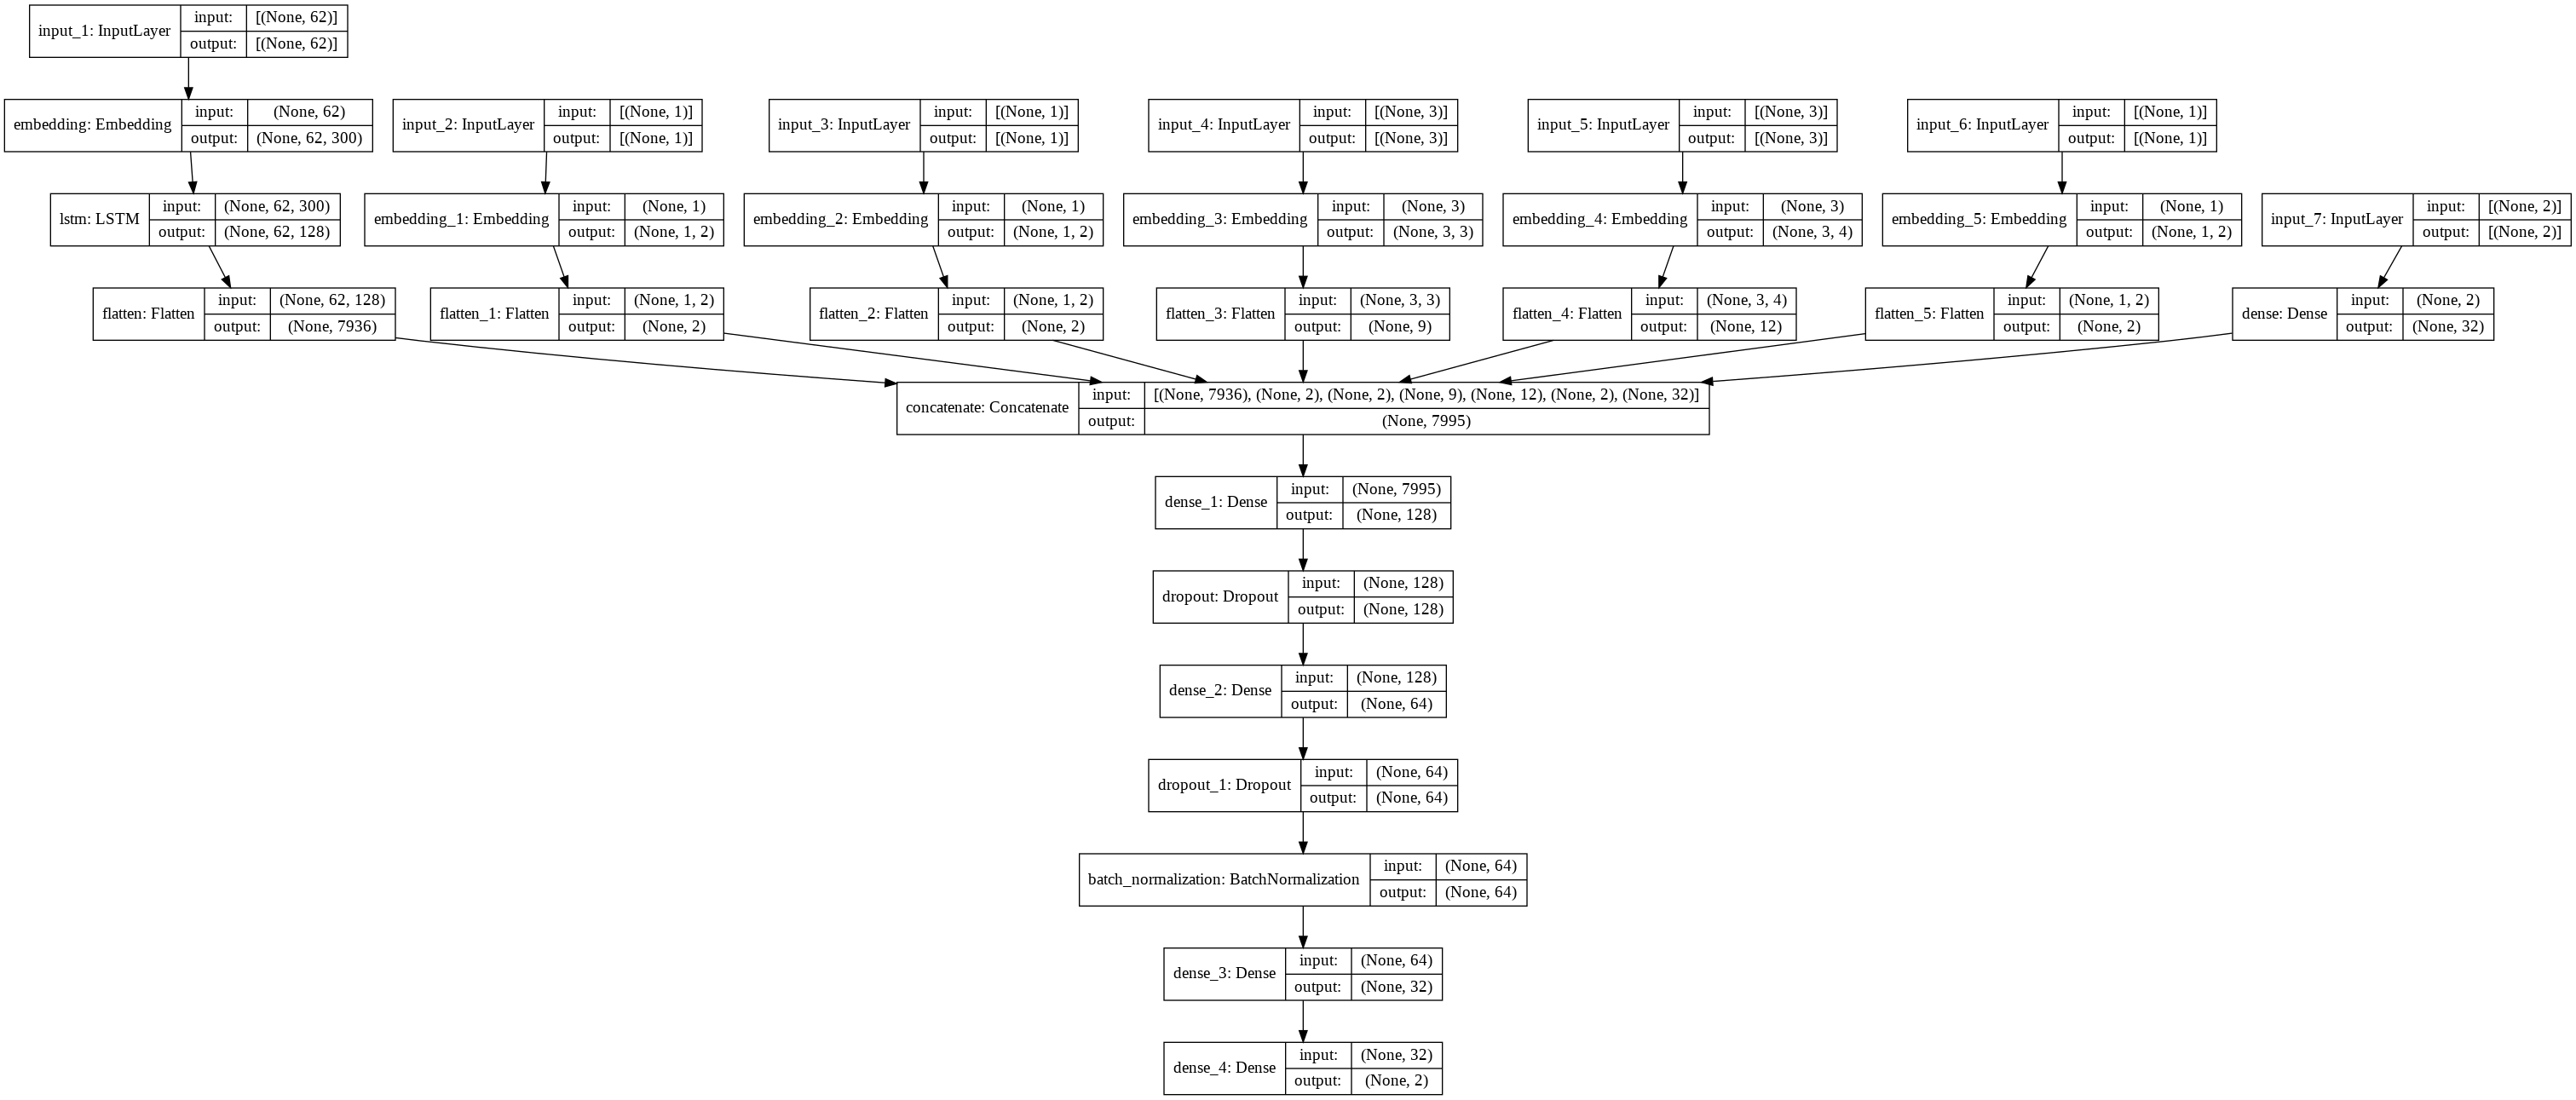

In [ ]:
tf.keras.backend.clear_session()
model_2 = Model_2()
model_2_json = model_2.to_json()
with open(filepath+'model_ckpt/model_2/model_2.json', 'w') as json_file:
    json_file.write(model_2_json)
model_2.summary()
print('\n')
plot_model(model_2, show_shapes=True)

In [ ]:
tf.keras.backend.clear_session()
model_2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(curve='PR')])

train_input_list = [X_train_essay_iqr, X_train_school_state, X_train_project_grade_category, X_train_clean_categories, X_train_clean_subcategories, X_train_teacher_prefix, X_train_numerical_features]
cv_input_list = [X_cv_essay_iqr, X_cv_school_state, X_cv_project_grade_category, X_cv_clean_categories, X_cv_clean_subcategories, X_cv_teacher_prefix, X_cv_numerical_features]
test_input_list = [X_test_essay_iqr, X_test_school_state, X_test_project_grade_category, X_test_clean_categories, X_test_clean_subcategories, X_test_teacher_prefix, X_test_numerical_features]

model_2.fit(x= train_input_list, y = y_train_ohe, batch_size=2048, epochs=3, validation_data=(cv_input_list, y_cv_ohe))

Epoch 1/3
43/43 [==============================] - 8s 114ms/step - loss: 4.1945 - accuracy: 0.5700 - auc: 0.5786 - val_loss: 2.3496 - val_accuracy: 0.8486 - val_auc: 0.7927
Epoch 2/3
43/43 [==============================] - 4s 98ms/step - loss: 2.1520 - accuracy: 0.8288 - auc: 0.8188 - val_loss: 1.7809 - val_accuracy: 0.8486 - val_auc: 0.8367
Epoch 3/3
43/43 [==============================] - 4s 99ms/step - loss: 1.6509 - accuracy: 0.8437 - auc: 0.8303 - val_loss: 1.4112 - val_accuracy: 0.8486 - val_auc: 0.8549


In [ ]:
# Evaluate model
evaluate_model(train_input_list, test_input_list, 'model_1', best_weights_file)

### Model-3


#### Model_3 info

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

#### One hot encoding categorical data and create feature set for model3

In [ ]:
# School_state
X_train_school_state_ohe, X_cv_school_state_ohe, X_test_school_state_ohe = one_hot_encoder(X_train.school_state, X_cv.school_state, X_test.school_state)

# project_grade_category
X_train_project_grade_category_ohe, X_cv_project_grade_category_ohe, X_test_project_grade_category_ohe = one_hot_encoder(X_train.project_grade_category, X_cv.project_grade_category, X_test.project_grade_category)

# clean_categories
X_train_clean_categories_ohe, X_cv_clean_categories_ohe, X_test_clean_categories_ohe = one_hot_encoder(X_train.clean_categories, X_cv.clean_categories, X_test.clean_categories)

# clean_subcategories
X_train_clean_subcategories_ohe, X_cv_clean_subcategories_ohe, X_test_clean_subcategories_ohe = one_hot_encoder(X_train.clean_subcategories, X_cv.clean_subcategories, X_test.clean_subcategories)

# teacher_prefix
X_train_teacher_prefix_ohe, X_cv_teacher_prefix_ohe, X_test_teacher_prefix_ohe = one_hot_encoder(X_train.teacher_prefix, X_cv.teacher_prefix, X_test.teacher_prefix)

Shape of feature school_state in train data after one hot encoding:  (87507, 51)
Shape of feature school_state in cv data  after one hot encoding:  (10816, 51)
Shape of feature school_state in test data after one hot encoding:  (10925, 51)


Shape of feature project_grade_category in train data after one hot encoding:  (87507, 4)
Shape of feature project_grade_category in cv data  after one hot encoding:  (10816, 4)
Shape of feature project_grade_category in test data after one hot encoding:  (10925, 4)


Shape of feature clean_categories in train data after one hot encoding:  (87507, 51)
Shape of feature clean_categories in cv data  after one hot encoding:  (10816, 51)
Shape of feature clean_categories in test data after one hot encoding:  (10925, 51)


Shape of feature clean_subcategories in train data after one hot encoding:  (87507, 394)
Shape of feature clean_subcategories in cv data  after one hot encoding:  (10816, 394)
Shape of feature clean_subcategories in test data after one

In [ ]:
np.concatenate((X_train_school_state_ohe, X_train_project_grade_category_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_teacher_prefix_ohe), axis=1)

(87507, 9)

In [ ]:
X_train_other_than_essay =  np.concatenate((X_train_school_state_ohe, X_train_project_grade_category_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_teacher_prefix_ohe, X_train_numerical_features), axis=1)

X_cv_other_than_essay = np.concatenate((X_cv_school_state_ohe, X_cv_project_grade_category_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_teacher_prefix_ohe, X_cv_numerical_features), axis=1)

X_test_other_than_essay = np.concatenate((X_test_school_state_ohe, X_test_project_grade_category_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_teacher_prefix_ohe, X_test_numerical_features), axis=1)

#### Compile, fit and evaluate Model_3

Model: "Model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 62)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 507, 1)]     0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 62, 300)      3266400     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 507, 64)      256         input_2[0][0]                    
____________________________________________________________________________________________

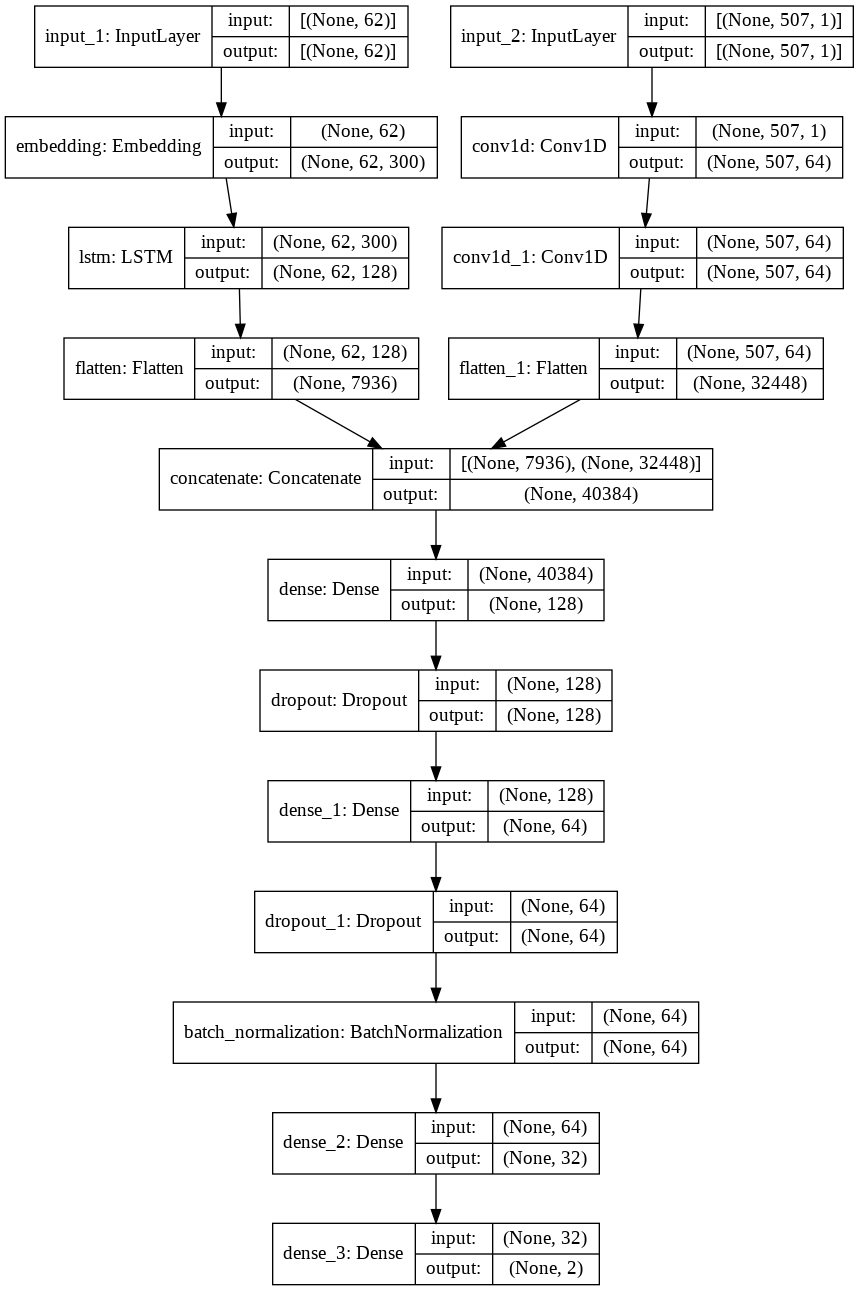

In [ ]:
tf.keras.backend.clear_session()
model_3 = Model_3()
model_3_json = model_3.to_json()
with open(filepath+'model_ckpt/model_3/model_3.json', 'w') as json_file:
    json_file.write(model_3_json)
model_3.summary()
print('\n')
plot_model(model_3, show_shapes=True)

In [ ]:
tf.keras.backend.clear_session()
model_3.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(curve='PR')])

train_input_list = [X_train_essay_iqr, X_train_other_than_essay]
cv_input_list = [X_cv_essay_iqr, X_cv_other_than_essay]
test_input_list = [X_test_essay_iqr, X_test_other_than_essay]

model_3.fit(x= train_input_list, y = y_train_ohe, batch_size=2048, epochs=3, validation_data=(cv_input_list, y_cv_ohe))

Epoch 1/3
43/43 [==============================] - 12s 207ms/step - loss: 5.8390 - accuracy: 0.4673 - auc: 0.4442 - val_loss: 3.7069 - val_accuracy: 0.8486 - val_auc: 0.7873
Epoch 2/3
43/43 [==============================] - 8s 192ms/step - loss: 3.4448 - accuracy: 0.7996 - auc: 0.7953 - val_loss: 2.7312 - val_accuracy: 0.8486 - val_auc: 0.8505
Epoch 3/3
43/43 [==============================] - 8s 193ms/step - loss: 2.5615 - accuracy: 0.8427 - auc: 0.8252 - val_loss: 2.1284 - val_accuracy: 0.8486 - val_auc: 0.8544


In [ ]:
# Evaluate model
evaluate_model(train_input_list, test_input_list, 'model_1', best_weights_file)

### Tensorboard

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [ ]:
# %load_ext tensorboard
%tensorboard --logdir logs